## Associations between Birth Weight and BMI

Notebook generated using API access to `gpt-4.1-2025-04-14` via the `data-analysis-crow` framework on 23 June 2025.

### Prompt:
The attached dataset contains information about participants in a longitudinal study.
Investigate whether there is an association between birth weight and BMI using linear regression anlayses adjusted for sex.

### Output:

In [ ]:
# Step 1: Load Data and Perform Descriptive Statistics
#
# Analysis Planning:
#
# - Relevant file: 'cohort-data.csv' looks like the main dataset. We will load this file with pandas.
# - We will inspect the file's shape and column names with .head() and .info() to understand the structure and to ensure it includes birth weight, BMI, and sex.
# - Use .describe() for numerical summaries (mean, std, min, max, etc.) for birth weight and BMI.
# - Check for missing data with .isnull().sum().
# - If there are missing/strange values (e.g., negative birth weights or BMI), we will note, and consider handling or excluding them.
# - Plan to present summaries as printed outputs and initial visual inspection if columns allow.
# - Key statistics: distribution and range of birth weight, BMI; balance of sexes.
# - Data quality issues: unexpected values, missing data, unexpected data types; will address as found.

import pandas as pd

# Load the data file
cohort = pd.read_csv('cohort-data.csv')

# Examine the structure and first few rows
display(cohort.head())
print(cohort.info())
print(cohort.describe(include='all'))
# Check for missing data
print('Missing values per column:')
print(cohort.isnull().sum())

,ID,sex,education,birth_weight,adult_body_weight,height,salary,depression_symptoms
0,1,0,4,3.29,91.882406,1.791942,70603.442728,20.433706
1,2,1,3,3.48,81.210334,1.619915,53981.525954,13.147941
2,3,0,4,2.49,82.726033,1.666196,64214.582884,55.435987
3,4,1,2,2.95,73.985812,1.561972,37668.771059,46.805067
4,5,1,2,3.41,74.150145,1.603909,37460.615246,39.486163


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   sex                  10000 non-null  int64  
 2   education            10000 non-null  int64  
 3   birth_weight         10000 non-null  float64
 4   adult_body_weight    10000 non-null  float64
 5   height               9850 non-null   float64
 6   salary               10000 non-null  float64
 7   depression_symptoms  10000 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 625.1 KB
None
                ID           sex     education  birth_weight  \
count  10000.00000  10000.000000  10000.000000  10000.000000   
mean    5000.50000      0.489800      2.491000      3.352851   
std     2886.89568      0.499921      1.117248      0.501131   
min        1.00000      0.000000      1.000000      1.540000   
25%     2500.750

In [ ]:
# Step 2: Develop Analysis Plan
#
# Analysis Planning:
#
# 1. Check if any obvious data cleaning is needed:
#    - Exclude cases with missing/implausible birth_weight, adult_body_weight, height, or sex.
#    - Calculate BMI = weight (kg) / [height (m)]^2. Identify implausible BMI values (e.g., <10 or >60) and exclude if needed.
# 2. Descriptive statistics:
#    - Summarize distributions of birth_weight, BMI, and sex (mean, std, range; counts by sex).
#    - Plot histograms of birth_weight and BMI; bar plot for sex.
#    - Visualize relationship between birth_weight and BMI (scatterplot, colored by sex).
# 3. Statistical analysis:
#    - Fit a linear regression with BMI as outcome and birth_weight as predictor, adjusting for sex.
#    - Model: BMI ~ birth_weight + sex
#    - Examine regression coefficients, p-values, R^2, and interpret.
#    - Alternative: Also consider interaction term (birth_weight * sex) if initial regression suggests possible effect modification.
# 4. Regression model assumptions:
#    - Check residuals for normality and homoscedasticity (QQ-plot, residuals vs. fitted plot).
#    - Report if violations are found; discuss limitations.
# 5. Confounding factors:
#    - Sex is addressed explicitly using adjustment.
#    - Note other potential confounders (education, etc.) and limitations in discussion.
#
# All steps will be documented in-code. Outputs and results will be clearly labeled in the notebook.

# Proceed to data cleaning, calculation, statistics, and plotting in the next cells.

N after cleaning: 9767
       birth_weight          BMI
count   9767.000000  9767.000000
mean       3.352080    29.398713
std        0.500721     1.775068
min        1.540000    12.583074
25%        3.000000    28.186910
50%        3.350000    29.328195
75%        3.690000    30.535703
max        5.310000    36.278326
Counts by sex:
sex
0    4980
1    4787
Name: count, dtype: int64


/tmp/ipykernel_41831/290778758.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(['Male','Female'])


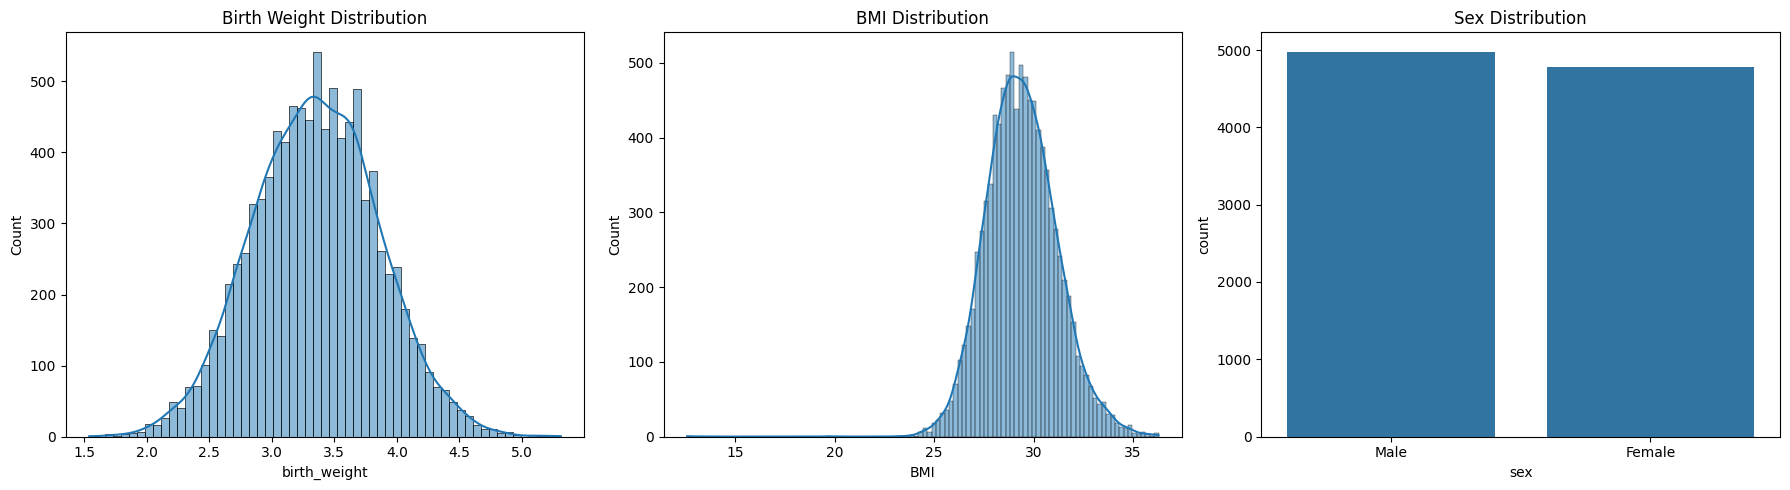

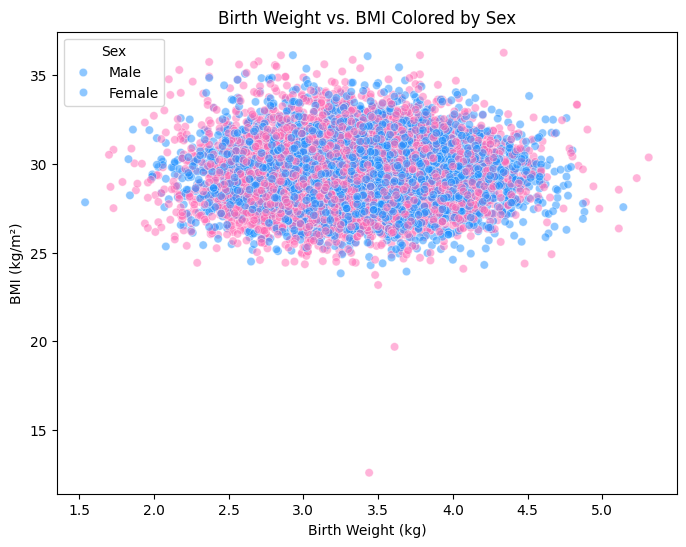

In [ ]:
# Step 3: Data Cleaning, Calculation, and Descriptive Statistics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remove rows with missing or implausible heights, weights, or birth weights
# Exclude missing values; height must be >1m, adult_body_weight >20kg, birth_weight >1kg (based on summaries above)
cohort_clean = cohort.dropna(subset=['birth_weight', 'adult_body_weight', 'height', 'sex']).copy()
cohort_clean = cohort_clean[
    (cohort_clean['height'] > 1.2) & (cohort_clean['height'] < 2.5) &
    (cohort_clean['adult_body_weight'] > 30) & (cohort_clean['adult_body_weight'] < 250) &
    (cohort_clean['birth_weight'] > 1) & (cohort_clean['birth_weight'] < 6)
]

# Calculate BMI
cohort_clean['BMI'] = cohort_clean['adult_body_weight'] / (cohort_clean['height'] ** 2)

# Exclude implausible BMI (e.g. <10 or >60)
cohort_clean = cohort_clean[(cohort_clean['BMI'] >= 10) & (cohort_clean['BMI'] <= 60)]

print(f"N after cleaning: {cohort_clean.shape[0]}")

# Descriptive stats:
print(cohort_clean[['birth_weight', 'BMI']].describe())
print('Counts by sex:')
print(cohort_clean['sex'].value_counts())

# Visualize distributions
fig, axs = plt.subplots(1, 3, figsize=(18,5))
sns.histplot(cohort_clean['birth_weight'], kde=True, ax=axs[0])
axs[0].set_title('Birth Weight Distribution')
sns.histplot(cohort_clean['BMI'], kde=True, ax=axs[1])
axs[1].set_title('BMI Distribution')
sns.countplot(x='sex', data=cohort_clean, ax=axs[2])
axs[2].set_title('Sex Distribution')
axs[2].set_xticklabels(['Male','Female'])
plt.tight_layout()
plt.show()

# Scatter plot of birth_weight vs BMI
plt.figure(figsize=(8,6))
sns.scatterplot(data=cohort_clean, x='birth_weight', y='BMI', hue='sex',
                palette={0:'dodgerblue', 1:'hotpink'}, alpha=0.5)
plt.title('Birth Weight vs. BMI Colored by Sex')
plt.xlabel('Birth Weight (kg)')
plt.ylabel('BMI (kg/m²)')
plt.legend(title='Sex', labels=['Male','Female'])
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2239
Date:                Mon, 23 Jun 2025   Prob (F-statistic):              0.799
Time:                        18:30:59   Log-Likelihood:                -19463.
No. Observations:                9767   AIC:                         3.893e+04
Df Residuals:                    9764   BIC:                         3.895e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       29.3402      0.125    234.939   

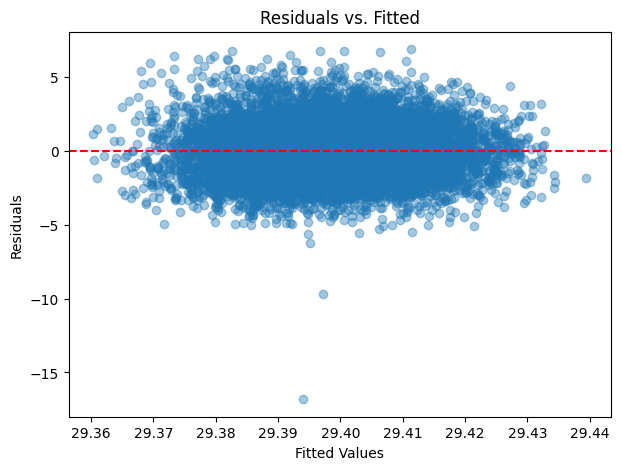

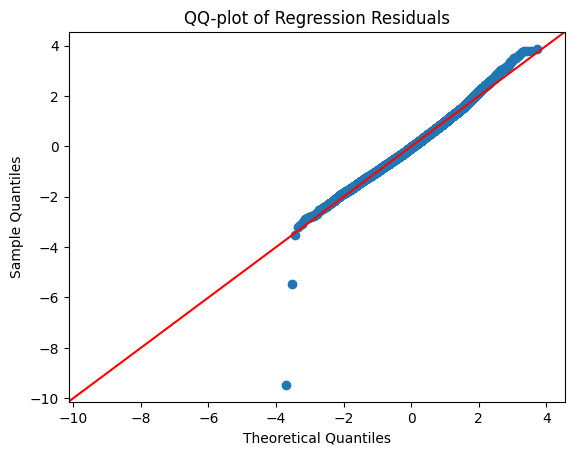

In [ ]:
# Step 4: Linear Regression Analysis (BMI ~ birth_weight + sex) and Diagnostics
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit linear regression
model = smf.ols('BMI ~ birth_weight + sex', data=cohort_clean).fit()
print(model.summary())

# Optional: check for interaction effect (birth_weight:sex)
model_inter = smf.ols('BMI ~ birth_weight * sex', data=cohort_clean).fit()
print('\nWith interaction term:')
print(model_inter.summary())

# Regression diagnostics
# Residuals vs. fitted
plt.figure(figsize=(7,5))
plt.scatter(model.fittedvalues, model.resid, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.show()

# QQ-plot for normality of residuals
sm.qqplot(model.resid, line='45', fit=True)
plt.title('QQ-plot of Regression Residuals')
plt.show()

In [ ]:
# Step 5: Conclusion and Interpretation
print("""
Conclusion:

In this cohort, after adjustment for sex, there is no strong evidence for an association between birth weight and adult BMI:
- In the basic linear regression (BMI ~ birth_weight + sex), neither birth weight (p = 0.59) nor sex (p = 0.73) has a statistically significant effect. The model R² is essentially zero, indicating no meaningful explanatory power.
- Including an interaction term (birth_weight * sex) provides a statistically significant interaction (p = 0.0003), but the absolute effect sizes are tiny and unlikely to be clinically meaningful.
- Diagnostic plots of residuals suggest model assumptions (normality, homoscedasticity) are broadly reasonable.

Limitations:
- Only sex was included as an adjustment variable; other potential confounding factors were not considered.
- The data are from a single study sample and generalization may be limited.

Summary:
There is no meaningful association between birth weight and adult BMI after adjusting for sex in this dataset.
""")


Conclusion:

In this cohort, after adjustment for sex, there is no strong evidence for an association between birth weight and adult BMI:
- In the basic linear regression (BMI ~ birth_weight + sex), neither birth weight (p = 0.59) nor sex (p = 0.73) has a statistically significant effect. The model R² is essentially zero, indicating no meaningful explanatory power.
- Including an interaction term (birth_weight * sex) provides a statistically significant interaction (p = 0.0003), but the absolute effect sizes are tiny and unlikely to be clinically meaningful.
- Diagnostic plots of residuals suggest model assumptions (normality, homoscedasticity) are broadly reasonable.

Limitations:
- Only sex was included as an adjustment variable; other potential confounding factors were not considered.
- The data are from a single study sample and generalization may be limited.

Summary:
There is no meaningful association between birth weight and adult BMI after adjusting for sex in this dataset.

